## Import CSV and store in DataFrame and inspect

In [1]:
import pandas as pd
df = pd.read_csv('uber-raw-data-apr14.csv', parse_dates=['Date/Time'])

In [2]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


#### Describe the data

In [4]:
df.describe(include='all', datetime_is_numeric=True)

,Date/Time,Lat,Lon,Base
count,564516,564516.000000,564516.000000,564516
unique,NaN,NaN,NaN,5
top,NaN,NaN,NaN,B02682
freq,NaN,NaN,NaN,227808
mean,2014-04-16 17:46:01.296261120,40.740005,-73.976817,NaN
min,2014-04-01 00:00:00,40.072900,-74.773300,NaN
25%,2014-04-08 16:27:00,40.722500,-73.997700,NaN
50%,2014-04-16 19:19:00,40.742500,-73.984800,NaN
75%,2014-04-24 22:14:00,40.760700,-73.970000,NaN
max,2014-04-30 23:59:00,42.116600,-72.066600,NaN


#### We only have 5 unique bases so we can turn that into a category

In [5]:
df['Base'] = df['Base'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2)
memory usage: 13.5 MB


#### Create day of month, weekday, and hour columns

In [7]:
df['dom'] = df['Date/Time'].dt.day
df['weekday'] = df['Date/Time'].dt.weekday
df['hour'] = df['Date/Time'].dt.hour

In [8]:
df.sample(5)

,Date/Time,Lat,Lon,Base,dom,weekday,hour
368219,2014-04-05 21:34:00,40.7184,-73.9494,B02682,5,5,21
300387,2014-04-24 18:15:00,40.7647,-73.9681,B02617,24,3,18
530308,2014-04-28 15:47:00,40.7229,-74.0080,B02682,28,0,15
116188,2014-04-16 17:15:00,40.7686,-73.8626,B02598,16,2,17
128152,2014-04-18 15:15:00,40.7413,-74.0013,B02598,18,4,15


## Analyze the data

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='dom', ylabel='Count'>

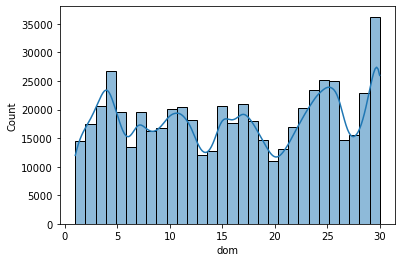

In [10]:
sns.histplot(data=df['dom'], bins=30, kde=True)

<AxesSubplot:xlabel='weekday', ylabel='Count'>

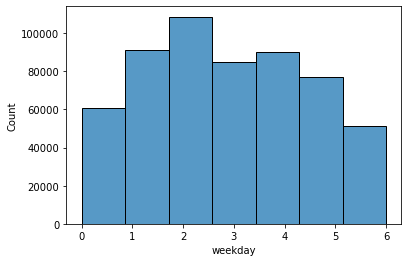

In [11]:
sns.histplot(data=df['weekday'], bins=7)

In [12]:
weekday_hour_group = df.groupby(['weekday', 'hour']).apply(len).unstack()
weekday_hour_group

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


<AxesSubplot:xlabel='hour', ylabel='weekday'>

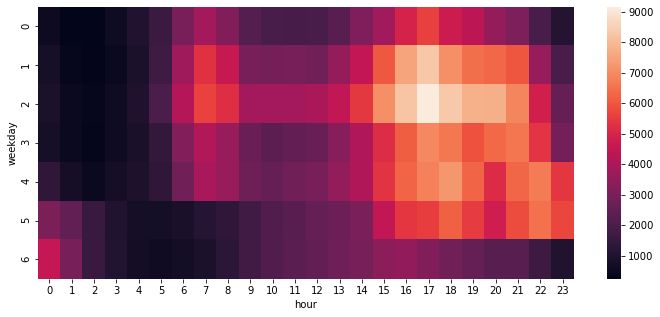

In [13]:
plt.figure(figsize=(12, 5))
sns.heatmap(weekday_hour_group)

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

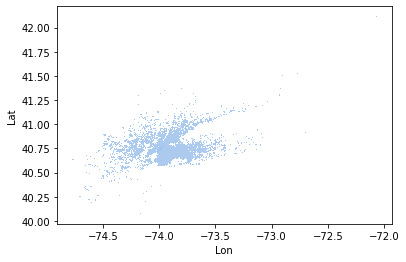

In [14]:
sns.histplot(df, x='Lon', y='Lat')

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

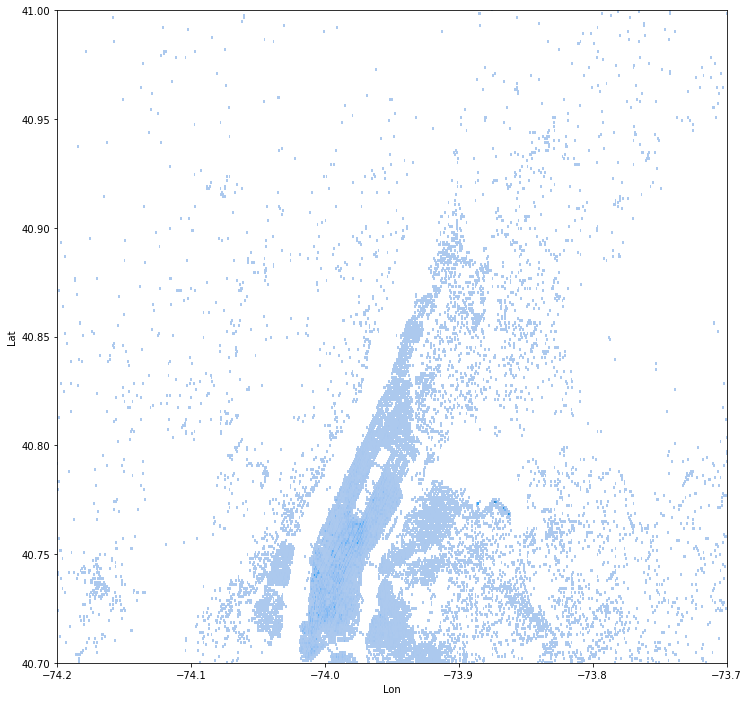

In [15]:
plt.figure(figsize=(12, 12))
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)
sns.histplot(df, x='Lon', y='Lat')